In [1]:
# création d'un dataset avec chaque année et chaque variable économique
import import_ipynb
import utils
import numpy as np

data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")
# 11 = dataset de 1992 12 = dataset de 1996 ...
annee = 18
data_pop = data_pop[annee:]
data_fertility = data_fertility[annee:]
data_child = data_child[annee:]
data_capita = data_capita[annee:]



X = np.concatenate((
    data_pop[0].iloc[:, 1:], 
    data_fertility[0].iloc[:,1:], 
    data_child[0].iloc[:,1:], 
    data_capita[0].iloc[:,1:] 
), axis=1)


In [2]:
# chargement des labels a partir d'ici il faudra répéter cette opération pour chaque événement olympique
# test pour 1992
import pandas as pd
df_delegations = pd.read_csv("./second_part_countries_cleaned_normalized.csv")


In [3]:
y = df_delegations.iloc[:, :-1]
y = y.iloc[0, :]

In [4]:
y

Albania       0.004425
Algeria       0.061947
Angola        0.004425
Argentina     0.053097
Armenia       0.000000
                ...   
Uzbekistan    0.000000
Venezuela     0.022124
Vietnam       0.000000
Zambia        0.013274
Zimbabwe      0.000000
Name: 0, Length: 143, dtype: float64

In [5]:
X[:].shape

(143, 4)

In [6]:
len(y)

143

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0573 - mae: 0.1311 - val_loss: 0.0092 - val_mae: 0.0551
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0229 - mae: 0.0800 - val_loss: 0.0102 - val_mae: 0.0808
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0200 - mae: 0.0902 - val_loss: 0.0111 - val_mae: 0.0897
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0263 - mae: 0.1081 - val_loss: 0.0107 - val_mae: 0.0880
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0237 - mae: 0.0970 - val_loss: 0.0097 - val_mae: 0.0781
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0265 - mae: 0.0946 - val_loss: 0.0095 - val_mae: 0.0740
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0223 - mae: 0.0910 - val_loss: 0.0096 - val_mae: 0.0729
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205 - mae: 0.0844 - val_loss: 0.0099 - val_mae: 0.0755
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0285 - mae:

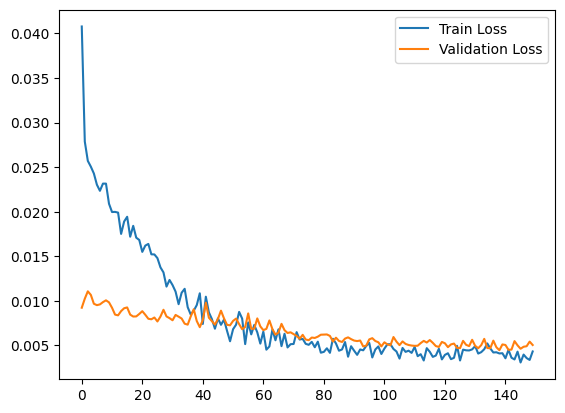

In [8]:
# plot de history pour voir l'évolution de la loss et de la mae
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [9]:
X[0]
predictions = model.predict(X)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [10]:
# affichage de chaque pays avec sa prédiction le nom de pays sont dans df_pop[0].iloc[0, 1] enregistrement dans un fichier csv

res = []
for i in range(len(predictions)):
    res.append({
        "country": data_pop[0].iloc[i, 0],
        "prediction": predictions[i][0],
        "real": y[i]
    })
    
pd.DataFrame(data=res).to_csv("predictions_mpl_1992.csv")

C:\Users\Julien\AppData\Local\Temp\ipykernel_15592\109845671.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "real": y[i]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Coefficient de détermination R^2 : 0.58


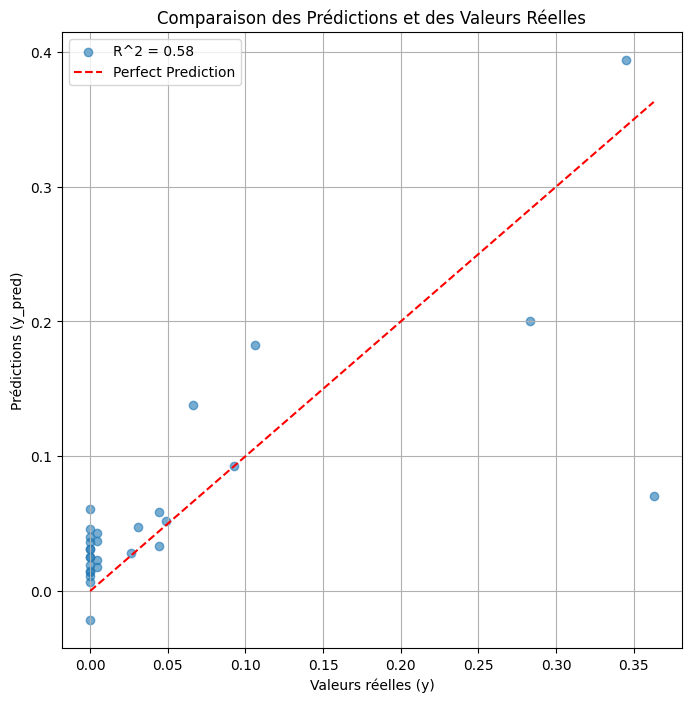

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Effectuer les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le R^2
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R^2 : {r2:.2f}")

# Création du graphique
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label=f"R^2 = {r2:.2f}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.xlabel("Valeurs réelles (y)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Comparaison des Prédictions et des Valeurs Réelles")
plt.legend()
plt.grid(True)
plt.show()
